# Numpy-II

## Content

- **Operations on Numpy Arrays** 
    - Algebric operations on np arrays with single numbers
    - Operations on two or more np arrays
    - Matrix Multiplication - `matmul()`, `@`, `dot()`


- **Vectorization** 
    - `np.vectorize()`


- **Broadcasting**
    - `np.tile()`


- **Array splitting and Merging**
    - Splitting arrays - `split()`, `hsplit()`, `vsplit()`
    - Merging Arrays - `hstack()`, `vstack()`, `concatenate()`


- **Shallow vs Deep Copy**

    
- **3D arrays**
    
    
- **Use Case: Image Manipulation using Numpy**
    - Opening an Image
    - Details of an image
    - Visualizing RGB Channels
    - Rotating an Image (Transposing a Numpy Array)
    - Saving `ndarray` as Image

In [83]:
import numpy as np


## Operations on Numpy Arrays

### Algebric operations on np arrays with single numbers


In [84]:
m1 = np.arange(12).reshape(3, 4)
m1 + 2

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

In [85]:
m1 = np.arange(12).reshape(3, 4)
m1 * 2

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])


### Algebric operations on two np arrays

In [86]:
# Corresponding elements of arrays get added
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
a + b

array([3, 4, 5])

In [87]:
# Corresponding elements of arrays get multiplied
a * b

array([2, 4, 6])


#### Now what if we use multiplication operator on matrices created using numpy?

In [88]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [89]:
B = np.arange(12).reshape(3, 4)
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [90]:
A * B

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

- it ** did element-wise multiplication**


#### What is the requirement of dimensions of 2 matrices for Matrix Multiplication?

- **Columns of A = Rows of B**


- **If A is $3\times4$, B can be $4\times3$**... or $4\times(Something Else)$



In [91]:
B = B.reshape(4, 3)
B

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [92]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [93]:
A * B

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

**`*` operator only does Element-Wise Multiplication of 2 Matrices**

#### For actual Matrix Multiplication, We have a different method/operator

`np.matmul()`

In [94]:
np.matmul(A, B)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])


#### There's also a direct operator as well for Matrix Multiplication
`@`

In [95]:
A @ B

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

#### There is another method in np for doing Matrix Multiplication

- `np.dot()`matmul() function cannot perform multiplication of array with scalar values.

In [97]:
np.dot(A, B)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

**Other cases of `np.dot()`**
- It performs inner product of vectors when both inputs are 1D array
- It performs multiplication when both input are scalers.


In [98]:
a= np.array([1,2,3])
b = np.array([1,1,1])


In [99]:
np.dot(a,b) # 1*1 + 2*1 + 3*1 = 6

6

In [100]:
np.dot(4,5)

20

In [106]:
np.matmul(4,5)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

#### Multiplication of a mix of matrices and vectors


In [107]:
A = np.arange(12).reshape(3, 4)  # A is a 3x4 Matrix 
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [108]:
a = np.array([1, 2, 3])  # a is a 1x3 Vector 
print(a)
print(a.shape)

[1 2 3]
(3,)


In [109]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [111]:
a

array([1, 2, 3])

#### Will `A * a` work?

In [112]:
A * a

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

#### Will `a * A` work?

In [113]:
a * A

ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

#### Why does it not work for either cases?

- Because **`*` operator just performs element-wise multiplication**


- For this, **both `A` and `a` should have same shape**


#### However, `A * A` and `a * a` work

In [114]:
A * A # Multiplied with itself

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [115]:
a * a

array([1, 4, 9])

#### Now Let's experiment with `np.matmul()`

In [ ]:
# np.matmul(A, a)

- **Columns of `A` (4) $\neq$ Rows of `a` (1)** 


#### Will this work?

In [ ]:
# np.matmul(a, A)


- **Columns of `a` (3) = Rows of `A` (3)**


### Vectorization


#### `np.vectorize()`

- The vectorized function **evaluates element by element of the input arrays** like the python `map` function





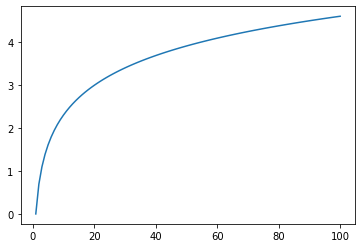

In [116]:
import math
import matplotlib.pyplot as plt

x = np.arange(1, 101)

y = np.vectorize(math.log)(x)

plt.plot(x, y)
plt.show()

In [117]:
y

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748

## Broadcasting


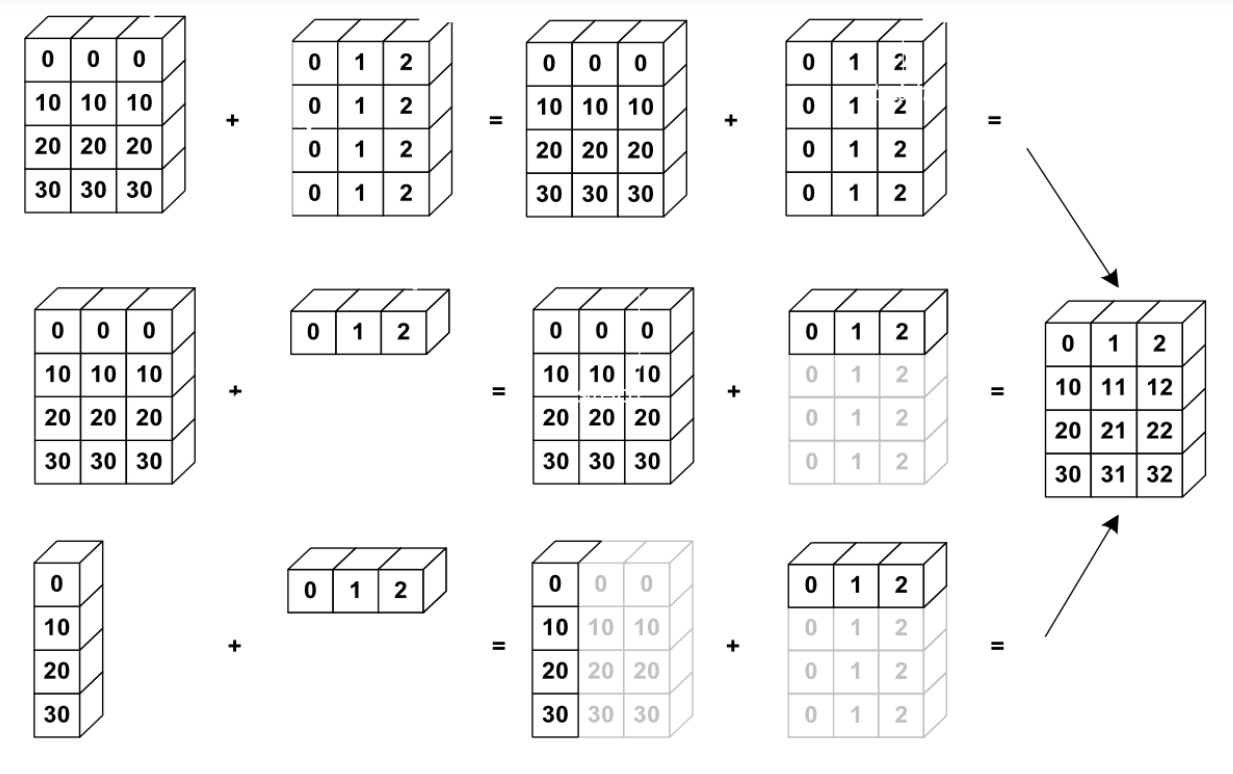

#### Case1: 
given two 2D array 

```
[[0,   0,  0],      [[0, 1, 2],
 [10, 10, 10], and   [0, 1, 2],
 [20, 20, 20],       [0, 1, 2],
 [30, 30, 30]]       [0, 1, 2]]

```
Shape of **first array** is **4x3**

Shape of **second array** is **4x3**.


In [119]:
a = np.tile(np.arange(0,40,10), (3,1))
a

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

**`np.tile` function is used to repeat the given array multiple times**

In [120]:
np.tile(np.arange(0,40,10), (3,2))

array([[ 0, 10, 20, 30,  0, 10, 20, 30],
       [ 0, 10, 20, 30,  0, 10, 20, 30],
       [ 0, 10, 20, 30,  0, 10, 20, 30]])

In [121]:
a

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

In [122]:
a = a.T

In [123]:
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [124]:
b = np.tile(np.arange(0,3), (4,1))

In [125]:
b

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [126]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])


#### Case2 : 

Imagine an array like this:

```

[[0,   0,  0],     
 [10, 10, 10],  
 [20, 20, 20],       
 [30, 30, 30]]

```
We want to add the following array to it:

```
 [[0, 1, 2]]

```


**What broadcasting does is replicate the second array row wise 4 times to fit the size of first array.**


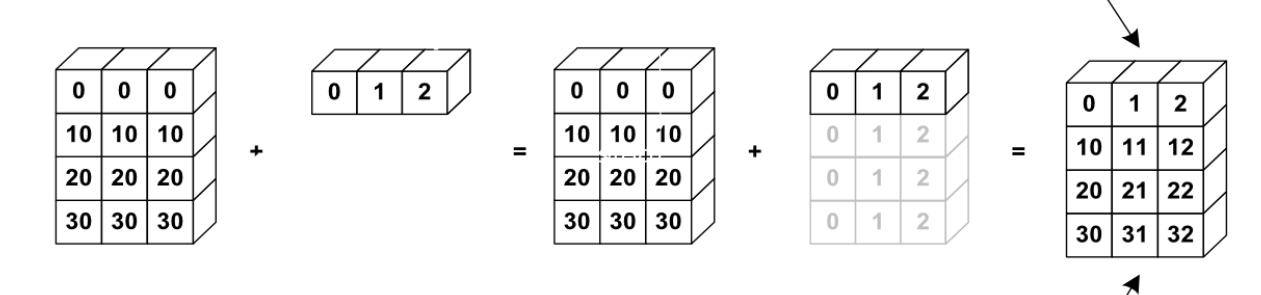

In [127]:
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [128]:
b = np.arange(0,3)
b

array([0, 1, 2])

In [129]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])



#### Case 3: 

Imagine two array like this:

```
     [[0],
     [10],
     [20],
     [30]]

```
and 

```
  [[0, 1, 2]]

```
 

Broadcasting will replicate first array column wise 3 time and secord array row wise 4 times to match up the shape.


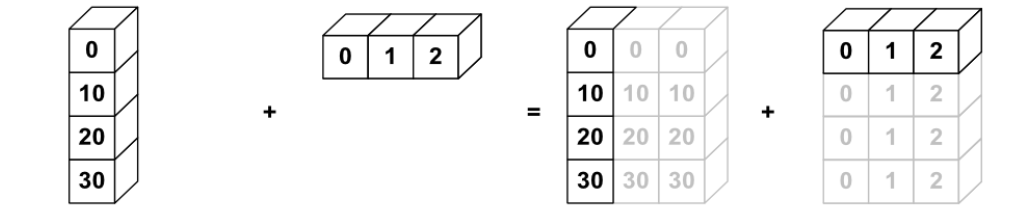

In [130]:
a = np.arange(0,40,10)
a

array([ 0, 10, 20, 30])

This is a 1D row wise array, But we want this array colum wise. 

In [131]:
a = a.reshape(4,1)
a

array([[ 0],
       [10],
       [20],
       [30]])

In [132]:
b = np.arange(0,3)
b

array([0, 1, 2])

In [133]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### General Broadcasting rules



When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left.

Two **dimensions** are compatible when:
1. they are equal, or
2. one of them is 1


If these conditions are not met, a **ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes.**



In [134]:
a = np.arange(8).reshape(2,4)
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [135]:
b = np.arange(16).reshape(4,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [136]:
a + b

ValueError: operands could not be broadcast together with shapes (2,4) (4,4) 


####  Example:


In [137]:
A = np.arange(1,10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [138]:
B = np.array([-1, 0, 1])
B

array([-1,  0,  1])

In [139]:
A * B

array([[-1,  0,  3],
       [-4,  0,  6],
       [-7,  0,  9]])

#### Why did `A * B` work in this case?

- `A` has 3 rows and 3 columns

- `B` is a 1-D vector with 3 elements

- So, **`B` gets broadcasted over `A` for each row of `A`**



In [140]:
A = np.arange(1,10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [141]:
B = np.arange(3, 10, 3).reshape(3,1)
B

array([[3],
       [6],
       [9]])

In [142]:
C = A + B
#np.round(C, 1)
C

array([[ 4,  5,  6],
       [10, 11, 12],
       [16, 17, 18]])

#### How did this `A + B` work?

- `A` has 3 rows and 3 columns

- `B` has 3 rows and 1 column


- So, **`B` gets broadcasted on every column of `A`**

***

## Array Splitting and Merging


### Splitting
#### `np.split()`

- Splits an array into multiple sub-arrays as views


#### It takes an argument `indices_or_sections`

- If `indices_or_sections` is an **integer, n**, the array will be **divided into n equal arrays along axis**. 

- If `indices_or_sections` is a **1-D array of sorted integers**, the entries indicate **where along axis the array is split**. 

- If an index **exceeds the dimension of the array along axis**, an **empty sub-array is returned** correspondingly.

In [143]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [149]:
np.split(x, 3)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [ ]:
#np.split(x, [3, 5, 6])

#### `np.hsplit()`

- Splits an array into multiple sub-arrays **horizontally (column-wise)**.

In [150]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

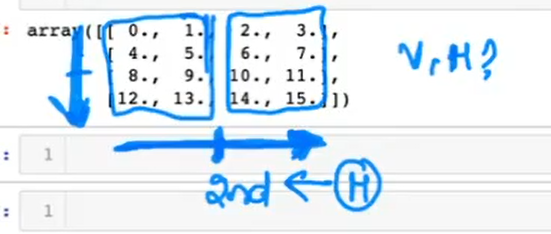


- There are 2 axis to a 2-D array
    1. **1st axis - Vertical axis**
    2. **2nd axis - Horizontal axis**


- The split we want happens across the **2nd axis (Horizontal axis)**


In [154]:
np.hsplit(x, 2)

[array([[ 0.,  1.],
        [ 4.,  5.],
        [ 8.,  9.],
        [12., 13.]]),
 array([[ 2.,  3.],
        [ 6.,  7.],
        [10., 11.],
        [14., 15.]])]

In [ ]:
# np.hsplit(x, np.array([3, 6]))

#### `np.vsplit()`

- Splits an array into multiple sub-arrays **vertically (row-wise)**.

In [155]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

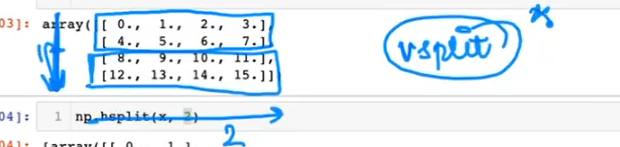


- The split we want happens across the **1st axis (Vertical axis)**


In [156]:
np.vsplit(x, 2)

[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]),
 array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

In [ ]:
# np.vsplit(x, np.array([3]))

### Stacking
#### Let's say we have an array and we want to stack it like this:


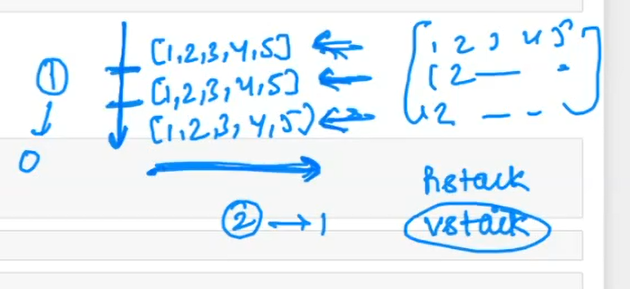

#### `np.vstack()`

- Stacks a list of arrays **vertically (along axis 0 or 1st axis)**

In [157]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [158]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### Now, What if we want to stack the array like this?

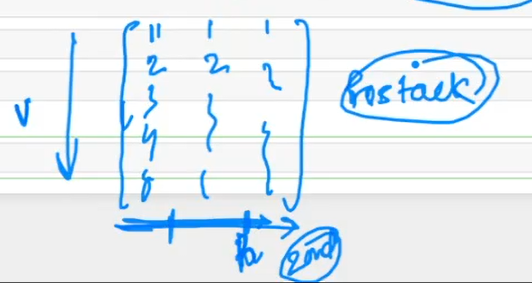



#### `np.hstack()`

- Stacks a list of arrays horizontally (along axis 1)


In [159]:
data = np.arange(5).reshape(5,1)
data

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [160]:
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])


#### Example

```
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.hstack((a, b))
```


In [161]:
a = np.array([[1], [2], [3]])
a

array([[1],
       [2],
       [3]])

In [162]:
b = np.array([[4], [5], [6]])
b 

array([[4],
       [5],
       [6]])

In [163]:
np.hstack((a, b))

array([[1, 4],
       [2, 5],
       [3, 6]])


### `np.concatenate()`

- Creates a new array by appending arrays after each other, along a given axis



In [164]:
z = np.array([[2, 4]])
z

array([[2, 4]])

In [165]:
z.ndim

2

In [166]:
zz = np.concatenate([z, z], axis=0)
zz

array([[2, 4],
       [2, 4]])

In [167]:
zz = np.concatenate([z, z], axis=1)
zz

array([[2, 4, 2, 4]])

#### few more examples using `np.concatenate()`

```
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
```

In [168]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [169]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [170]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])


#### `axis = 0` ---> It's a vertical axis

- So, **changes will happen along vertical axis**


#### When we **don't specify the axis (`axis=None`)**, `np.concatenate()` **flattens the arrays and concatenates them as 1-D row array**

In [171]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

***

## Views vs Copies (Shallow vs Deep Copy)

- Numpy **manages memory very efficiently** which makes it really **useful while dealing with large datasets**


In [172]:
# We'll create np array

a = np.arange(4)
a

array([0, 1, 2, 3])

In [173]:
# Reshape array `a` and store in b

b = a.reshape(2, 2)
b

array([[0, 1],
       [2, 3]])

In [175]:
a[0] = 100
a

array([100,   1,   2,   3])

In [176]:
b

array([[100,   1],
       [  2,   3]])


- Array **`b` got automatically updated**

### This is an example of Numpy using "Shallow Copy" of data

- Numpy **re-uses data** as much as possible **instead of duplicating** it


#### How data is stored using Numpy?

- Variable **does NOT directly point to data** stored in memory


- There is something called **Header** in-between


### What does Header do?

- **Variable points to header** and **header points to data** stored in memory


- Header stores **information about data** - called **Metadata**


#### `a` is pointing to Metadata about our data `[0, 1, 2, 3]`, which may include:

- **How many values** we have --> 4


- What is the **Data Type** of data --> `int`


- What's the **Shape** --> `(4,)`


#### When we do `b = a.reshape(2, 2)`

- It **uses the same data**


- And **create a New header for `b`** that **points to the same data** as pointed to by `a`


#### `b` points to a new Header having different values of Metadata of the same data:

- **Number of values** --> 4

- **Data Type** --> `int`

- **Shape** --> `(2, 2)`



### Now, Let's see an example where Numpy will create a "Deep Copy" of data

In [177]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [178]:
# Create `c`

c = a + 2
c

array([2, 3, 4, 5])

In [179]:
# We make changes in a

a[0] = 100
a

array([100,   1,   2,   3])

In [180]:
c

array([2, 3, 4, 5])


### Conclusion:

- Numpy is able to **use same data** for **simpler operations** like **reshape** ---> **Shallow Copy**


- It creates a **copy of data** where operations make **more permanent changes** to data ---> **Deep Copy**

#### check whether two arrays are sharing memory or not? => `np.shares_memory()` 


In [181]:
a= np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [182]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [183]:
np.shares_memory(a,b)

True

In [184]:
b[0] = 2
b

array([2, 2, 4, 6, 8])

In [185]:
a

array([2, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [186]:
b = a +2 

In [187]:
np.shares_memory(a,b)

False

***

## 3 Dimensional Arrays

### Vectors, Matrix and Tensors

1. **Vector** ---> **1-Dimensional** Array
2. **Matrix** ---> **2-Dimensional** Array
3. **Tensor** ---> **3 and above Dimensional** Array


#### `Tensor` is a general term we use

- Tensor can also be less than 3D


- **2D Tensor** is called a **Matrix**
- **1D Tensor** is called a **Vector**

In [188]:
B = np.arange(24).reshape(2, 3, 4)
B

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])



-  It's a **3-dimensional tensor**


- It is giving 2 matrices and each matrix has 3 rows and 4 columns


#### So, that's how reshape() is interpreted for 3D

- **1st argument** gives **depth** (No. of Matrices)


- **2nd agrument** gives **no. of rows** in each depth


- **3rd agrument** gives **no. of columns** in each depth



In [189]:
B[0] #gets just whole 1st Matrix

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [190]:
B[0, 0, 0] #gives first element of the first matrix

0

In [191]:
#### Question: What value will I get if I do `B[1, 1, 1]`?
B[1, 1, 1]

# It looks at Matrix 1, that is, 2nd Matrix (Not Matrix 0)
# Then it looks at row 1 of matrix 1
# Then it looks at column 1 of row 1 of matrix 1

17

## Use Case: Image Manipulation using Numpy

In [192]:
import numpy as np
import matplotlib.pyplot as plt


## Opening an Image 


**`imread()` – to read the images**

**`imshow()` – to display the images**



In [ ]:
#fruits image
!gdown 17tYTDPBU5hpby9t0kGd7w_-zBsbY7sEd 

In [ ]:
#emma stone image
!gdown 1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI 

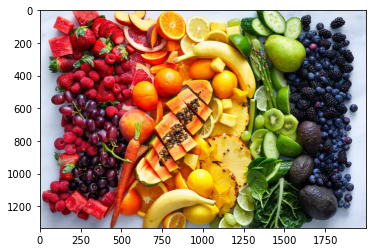

In [193]:
img = np.array(plt.imread('fruits.png'))
plt.imshow(img)

## Details of an Image 


In [194]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image

# of dims:  3
Img shape:  (1333, 2000, 3)


- **Coloured images have a 3rd dimension for depth or RGB colour channel**



#### Why is there a difference b/w normal np array and the np array generated from Matplotlib in terms of where the depth part of `shape` appears?

- This is how `matplotlib` reads the image


- It **reads the depth values (R, G and B values) of each pixel one by one** and stacks them one after the other

- `matplotlib` **first reads that each plane has $1333\times2000$ pixels**


- Then, it **reads depth values (R, G and B values) of each pixel and place the values in 3 separate planes**





## Visualizing RGB Channels

We can split the image into each RGB color channels using only Numpy 


- The image is made up of  **3 components/channels** - **Red, Green, Blue** - which form RGB values


- Coloured images are usually stored as 3-dimensional arrays of **8-bit unsigned integers**


- That is, each pixel's each channel, R, G and B can range from **0 to 255**


- So, a pixel **[255, 0, 0 ]** will be **RED** in colour

- A pixel **[0, 255, 0]** will be **GREEN** in colour

- A pixel **[0, 0, 255]** will be **BLUE** in colour


#### Now, Let's separate the R, G, B channels in our image:

- For **RED** channel, we'll **set values of GREEN and BLUE to 0**

- Similarly, for GREEN channel, we'll set values of RED and BLUE to 0

In [195]:
img = np.array(plt.imread('fruits.png'))

img_R, img_G, img_B = img.copy(), img.copy(), img.copy()

img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0

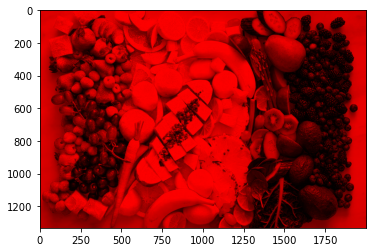

In [196]:
plt.imshow(img_R)

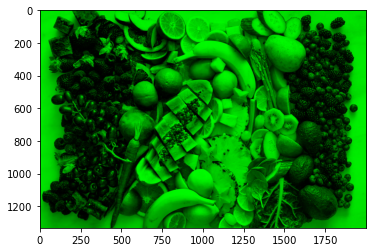

In [197]:
plt.imshow(img_G)

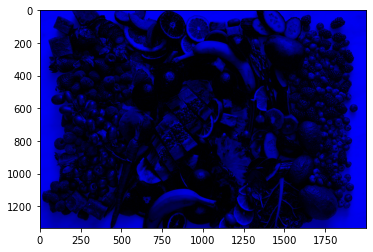

In [198]:
plt.imshow(img_B)

### Converting Image to Gray Scale 


- A gray scale image is one which **only has 1 channel** - Either R or G or B

- We can get images having a single channel using the concept of **slicing in Numpy**

- **RED channel** is at **depth index 0**
- **GREEN channel** is at **depth index 1**
- **BLUE channel** is at **depth index 2**


#### For example, to get grayscale image only for RED channel, we have to do something like:


- `image[:, :, 0]` means get **all rows, all columns**, and the **first (at index 0) color channel**, which is the **RED channel**.

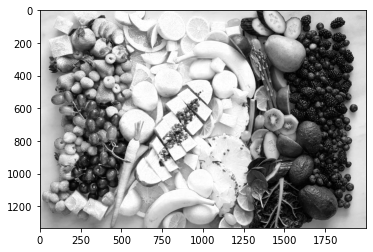

In [199]:
img = np.array(plt.imread('fruits.png'))

img_R_grayscale = img[:,:,0]
plt.imshow(img_R_grayscale, cmap='gray') 

# Matplotlib uses a colormap by default when plotting a single channel. 
# So, we have to specify `cmap='gray' within the `imshow() function


#### Let's check the shape of this gray scale image with only RED channel

In [200]:
img_R_grayscale.shape

(1333, 2000)



**GREEN channel is at depth index 1 and BLUE channel is at depth index 2**

- **`image[:, :, 1]`** ---> **Gray Scale image** with **only GREEN** channel

- **`image[:, :, 2]`** ---> **Gray Scale image** with **only BLUE** channel

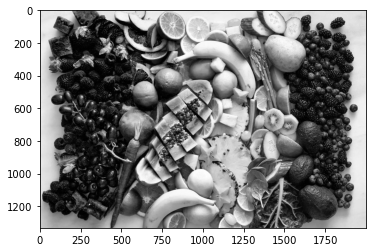

In [201]:
img_G_grayscale = img[:,:,1]
plt.imshow(img_G_grayscale, cmap='gray') 
#plt.imshow(img_G_grayscale) 

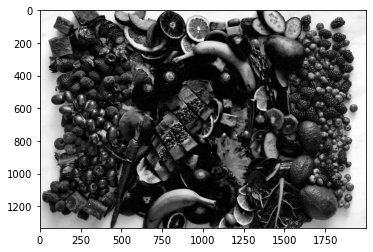

In [202]:
img_B_grayscale = img[:,:,2]
plt.imshow(img_B_grayscale, cmap='gray') 

## Rotating an Image (Transpose the Numpy Array)

- **Rotating the image means transposing the array**



#### For this, we'll use the `np.transpose()` function in numpy

**Function documentation: https://numpy.org/doc/stable/reference/generated/numpy.transpose.html**
- It takes 2 arguments


**1st argument** is  **array that we want to transpose**


**2nd argument is `axes`**
- Its a **tuple or list of ints**

- It contains a **permutation of [0,1,..,N-1] where N is the number of axes of array**

#### Now, our image array has 3 axes (3 dimensions) ---> 0th, 1st and 2nd


   - **Vertical axis (Row axis) is 0th axis**
   - **Horizontal axis (Column axis) is 1st axis**
   - **Depth axis is 2nd axis**


- So, we want to **interchange the order of row and column axis** ---> **interchange order of 0th and 1st axis**


- We **don't want to change the depth axis (2nd axis)** ---> So, it will **remain at its original order position**


Now, the **order of axes in orginal image is `(0, 1, 2)`**


- The **order of axes in rotated image will be `(1, 0, 2)`** 

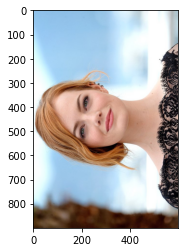

In [212]:
img = np.array(plt.imread('emma_stone.jpeg'))
img_rotated = np.transpose(img,(1,0,2))
plt.imshow(img_rotated)

## Saving Image as `ndarray`


In [213]:
path = 'emma_face.jpg'
plt.imsave(path, img_rotated)